In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,BatchNormalization
from tensorflow.keras import layers
from tensorflow import keras
import numpy as np
from sklearn.metrics import r2_score
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import EarlyStopping
from scipy import stats
import joblib

## Load data & Model

In [2]:
model_dtr = joblib.load('C:/Users/xuxia/2020F-Project/flu/.sav')
model_mlp = load_model("C:/Users/xuxia/2020F-Project/flu/")
model_knr = joblib.load('covid_KNeighborRegressor.sav')
train_dataset = pd.read_csv("train_dataset.csv")
test_dataset = pd.read_csv("test_dataset.csv")
train_features = train_dataset.copy()
test_features = test_dataset.copy()
train_labels = train_features.pop('new_case')
test_labels = test_features.pop('new_case')

## Error Visible Calculation

In [3]:
def errorCalculate(Origin,Predict):
    errorlist = []
    abserrorlist = []
    error = 0
    count = 0
    errorpercentage = 0

    for i in range(len(Origin)):
        count += 1
        True_num = Origin[i]
        Cal_num = Predict[i]
        Diff = Cal_num - True_num
        absDiff = abs(Cal_num - True_num)
        errorlist.append(Diff)
        abserrorlist.append(absDiff)
    errorlist = np.asarray(errorlist)
    abserrorlist = np.asarray(abserrorlist)
    return errorlist, abserrorlist

In [4]:
pred_1 = model_dtr.predict(train_features)
pred_2 = model_mlp.predict(train_features)
pred_3 = model_knr.predict(train_features) 
new_X = []
for i in range(len(pred_1)):
    new_X.append([pred_1[i],pred_2[i],pred_3[i]])
new_X = np.array(new_X).astype('float32')
new_y = train_labels.to_numpy()

pred_test_1 = model_dtr.predict(test_features)
pred_test_2 = model_mlp.predict(test_features)
pred_test_3 = model_knr.predict(test_features)
test_X =[]
for i in range(len(pred_test_1)):
    test_X.append([pred_test_1[i],pred_test_2[i],pred_test_3[i]])
test_X = np.array(test_X).astype('float32')
test_y = test_labels.to_numpy().astype

In [5]:
model = Sequential()
model.add(BatchNormalization(input_dim=new_X.shape[1]))
model.add(Dense(3,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(9,activation="relu"))
model.add(Dense(3,activation="relu"))
model.add(Dense(3,activation="relu"))
model.add(Dense(1, activation="linear"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 3)                 12        
_________________________________________________________________
dense (Dense)                (None, 3)                 12        
_________________________________________________________________
batch_normalization_1 (Batch (None, 3)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 12        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 4

In [6]:
opt = keras.optimizers.Adam(learning_rate=0.001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])
model.fit(new_X, new_y, epochs=200, batch_size=10000, verbose=2, validation_split=0.1,callbacks=[early_stopping])

Epoch 1/200
36/36 - 0s - loss: 5107.3760 - mean_squared_error: 5107.3760 - val_loss: 5499.0615 - val_mean_squared_error: 5499.0615
Epoch 2/200
36/36 - 0s - loss: 5104.5000 - mean_squared_error: 5104.5000 - val_loss: 5475.2490 - val_mean_squared_error: 5475.2490
Epoch 3/200
36/36 - 0s - loss: 5069.9995 - mean_squared_error: 5069.9995 - val_loss: 5415.1191 - val_mean_squared_error: 5415.1191
Epoch 4/200
36/36 - 0s - loss: 5023.2690 - mean_squared_error: 5023.2690 - val_loss: 5342.6816 - val_mean_squared_error: 5342.6816
Epoch 5/200
36/36 - 0s - loss: 4954.9863 - mean_squared_error: 4954.9863 - val_loss: 5240.3652 - val_mean_squared_error: 5240.3652
Epoch 6/200
36/36 - 0s - loss: 4843.2144 - mean_squared_error: 4843.2144 - val_loss: 5096.3135 - val_mean_squared_error: 5096.3135
Epoch 7/200
36/36 - 0s - loss: 4664.8945 - mean_squared_error: 4664.8936 - val_loss: 4884.1113 - val_mean_squared_error: 4884.1113
Epoch 8/200
36/36 - 0s - loss: 4392.6133 - mean_squared_error: 4392.6133 - val_loss

In [7]:
merge_predict = model.predict(new_X)
r2_score(merge_predict,train_labels)

0.6723411445268799

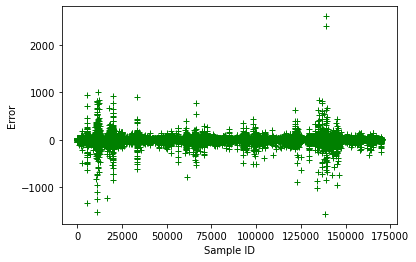

DescribeResult(nobs=170144, minmax=(array([9.918213e-05], dtype=float32), array([2612.8525], dtype=float32)), mean=array([17.355436], dtype=float32), variance=array([640.5663], dtype=float32), skewness=array([30.028025], dtype=float32), kurtosis=array([1736.1901], dtype=float32))

In [8]:
error,abserror = errorCalculate(test_labels,model.predict(test_X))
plt.plot(error,'g+')
plt.xlabel('Sample ID')
plt.ylabel('Error')
plt.show()
stats.describe(abserror)

In [9]:
model.save("C:/Users/xuxia/2020F-Project/Covid-19/merge_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: C:/Users/xuxia/2020F-Project/Covid-19/merge_model\assets


In [10]:
test_X

array([[0.80966353, 2.451274  , 0.6       ],
       [1.5215554 , 2.6094155 , 0.6       ],
       [1.5215554 , 2.707106  , 0.        ],
       ...,
       [5.814513  , 8.357125  , 5.        ],
       [5.814513  , 8.572607  , 5.        ],
       [5.814513  , 8.637398  , 5.        ]], dtype=float32)

In [12]:
model.predict([[1,1,1]])

array([[16.292795]], dtype=float32)